# Data Analyst Associate Practical Exam Submission
https://www.datacamp.com/certificate/DAA0015418512923
![](DAA0015418512923.png)

In [13]:
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

# 1. Data Validation
The original data has **879** rows and **9** columns. The `sales`, representing the sales of the product in dollars last year had the dollar sign removed. For example, “\$120,000” object was converted into 120000 integer. The `pet_type` should only have 4 types: 'cat', 'dog', 'fish', and 'bird'. There were 6 unique pet types, so the rows that indicate other pet types were not included in the analysis. Looking at the remaining columns:
* There are 833 unique Product ID
* There are 11 Product Category, as expected
* Sales range from 3k to 230k, averaging 116.1k
* Price range from 0.35 to 252 dollars, averaging 128 dollars
* There are 833 unique Vendor ID
* There are 5 unique Pet Size, as expected
* There are 4 Pet Types, as expected
* Ratings range from 1 to 10
* Rebuy is binary (1 or 0), as expected

In [14]:
df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/pet_sales.csv')
df.sales = df.sales.str.replace('$', '').str.replace(',','').astype(int)
df = df[df['pet_type'].isin(['cat','dog','fish','bird'])]

df.head()

C:\Users\jacks\AppData\Local\Temp\ipykernel_9688\122645465.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.sales = df.sales.str.replace('$', '').str.replace(',','').astype(int)


,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        833 non-null    int64  
 1   product_category  833 non-null    object 
 2   sales             833 non-null    int32  
 3   price             833 non-null    float64
 4   vendor_id         833 non-null    object 
 5   pet_size          833 non-null    object 
 6   pet_type          833 non-null    object 
 7   rating            833 non-null    int64  
 8   re_buy            833 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 61.8+ KB


# 2. Data Discovery and Visualization

# How many products are being purchased more than once?
There are 390 products being purchased more than once and 443 products not purchased more than once. The product that was re-purchased the most was Equipment with 69 rebuys. 




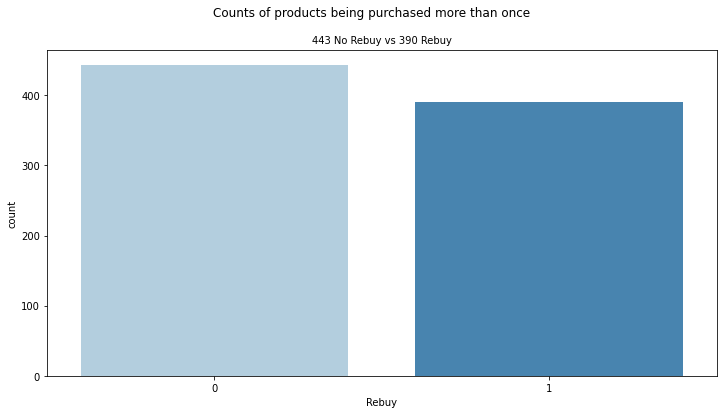

In [16]:
sns.countplot(data=df, x='re_buy', palette='Blues')

plt.suptitle("Counts of products being purchased more than once")
plt.title("443 No Rebuy vs 390 Rebuy", fontsize=10)
plt.xlabel("Rebuy");

In [17]:
rebuy_counts = df.groupby('product_category')['re_buy'].value_counts().reset_index(name='counts')

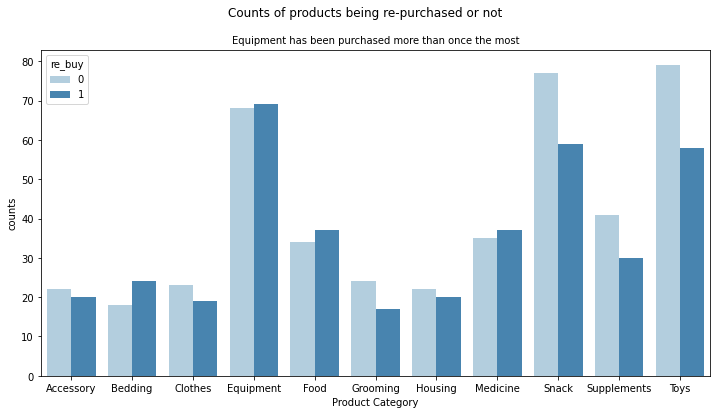

In [18]:
sns.barplot(data=rebuy_counts, x='product_category',y='counts',hue='re_buy', palette='Blues')

plt.suptitle('Counts of products being re-purchased or not')
plt.title("Equipment has been purchased more than once the most", fontsize=10)
plt.xlabel("Product Category");

# Do the products being purchased again have better sales than others?
The mean sales of products being purchased again is higher by about 1483 but the standard deviation is a lot higher than this amount. A hypothesis test was run and using a 5% level, we fail to infer the products being purchased again have better sales. Additionally, the distribution of sales between products re-purchased and products not re-purchased is very uniform so the level of sales are equally likely. This means the team should not only include the products being purchased more than once and consider other products as well.

In [19]:
ttestdata = df.groupby('re_buy')['sales'].apply(list)
stats.ttest_ind(a=ttestdata[1], b=ttestdata[0], alternative='greater')

Ttest_indResult(statistic=0.321933916175058, pvalue=0.3737918617420704)

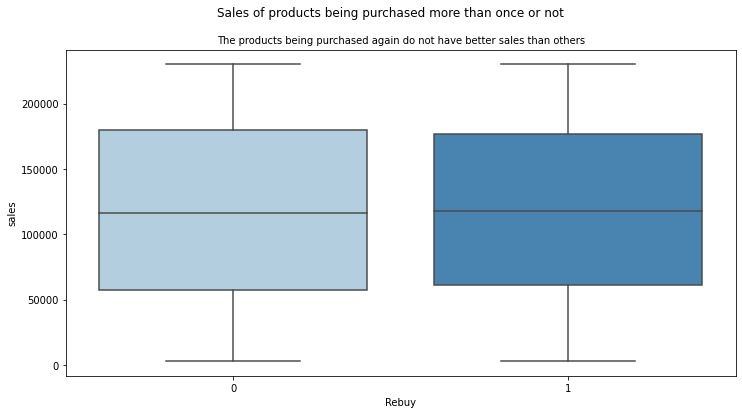

In [20]:
sns.boxplot(data=df, x='re_buy', y='sales', palette='Blues')

plt.suptitle('Sales of products being purchased more than once or not')
plt.title("The products being purchased again do not have better sales than others", fontsize=10)
plt.xlabel("Rebuy");

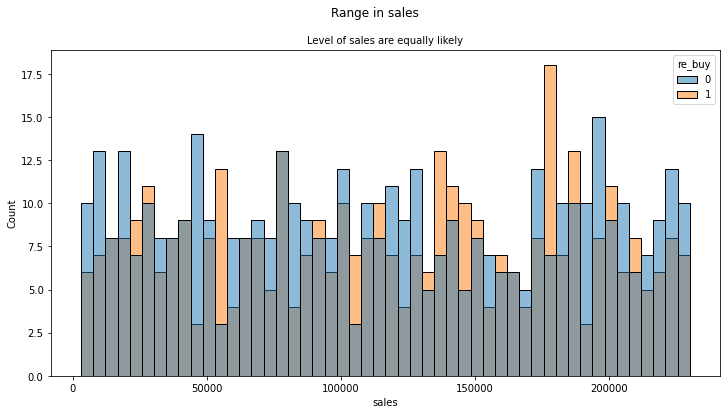

In [21]:
sns.histplot(x=df.sales, hue=df.re_buy, bins=50)

plt.suptitle('Range in sales')
plt.title("Level of sales are equally likely", fontsize=10);

# What products are more likely to be purchased again for different types of pets?
Since the marketing is preparing a list of popular products,  we want to know which products have been purchased again the most and for which pets they are bought for. So far dogs have the most products purchased again with 170, followed by cat products with 165. When looking at the products we can see that Equipment for dogs are the most popular products with 28 repurchases made, followed by cat equipment with 27, and snack for dogs with 25. These top 3 products are more likely to be purchased again and can be included in the teams subscription to retain loyal customers.

Breaking down popular products by pet types can help the marketing team understand how to target the specific audience. For different types of pets:
* `Snack` is more likely to be purchased again for `fish` with 8 rebuys
* `Equipment` is more likely to be purchased again for `dog` with 28 rebuys
* `Equipment` is more likely to be purchased again for `cat` with 27 rebuys
* `Equipment` is more likely to be purchased again for `bird` with 7 rebuys



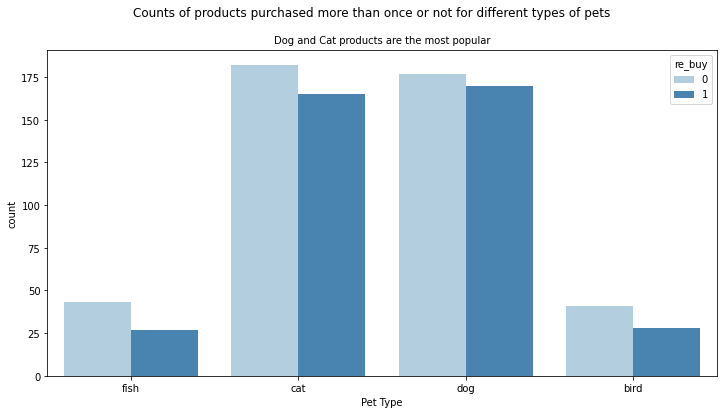

In [22]:
sns.countplot(data=df, x='pet_type', hue='re_buy', palette='Blues')
plt.suptitle('Counts of products purchased more than once or not for different types of pets')
plt.title("Dog and Cat products are the most popular", fontsize=10)
plt.xlabel('Pet Type');

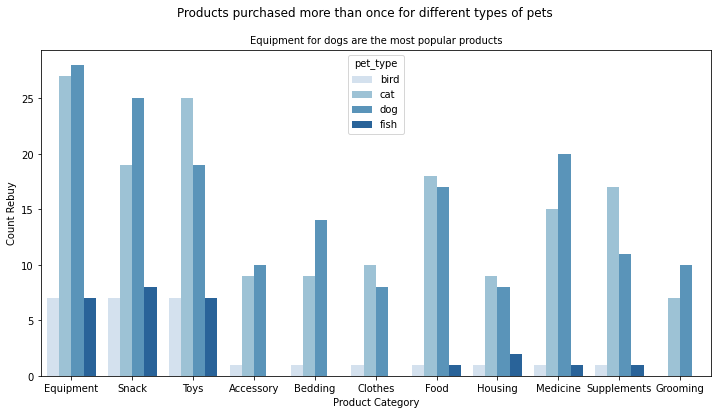

In [23]:
ss = df[df.re_buy==1].groupby('pet_type')['product_category'].value_counts().reset_index(name='re_buy')

sns.barplot(data=ss, x='product_category',y='re_buy',hue='pet_type', palette='Blues')
plt.suptitle('Products purchased more than once for different types of pets')
plt.title("Equipment for dogs are the most popular products", fontsize=10)
plt.xlabel("Product Category")
plt.ylabel("Count Rebuy");

# Recommendation to marketing team
Based on all of the above and the plan to retain loyal customers, the team can focus on products that were re-purchased the most, which is equipment for dogs and cats. Snacks for dogs and toys for cats can also be included in the subscription to retain customers. However, if the team plan is to increase sales, further analysis on which factors impact sales need to be done because the mean sales for popular products is not statistically higher than the others products.
